## Week 6: Assignment

## K-means Clustering

In [1]:
#Import libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**(1a) Load the data file 'kmc-data1.csv' and visualize the data.**

In [2]:
#Loading Data - kmc-data1.csv
X = pd.read_csv("kmc-data1.csv",header = None)
X

,0,1
0,5.816928,24.675884
1,6.639574,33.802423
2,2.050452,24.566468
3,4.153823,27.674693
4,6.515127,26.292065
...,...,...
235,2.460738,-10.688298
236,-5.171566,-0.836662
237,-1.889205,-0.239926
238,-8.565395,-3.294643


Text(0.5, 0, 'x2')

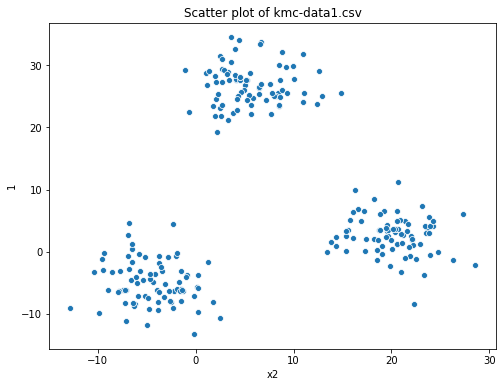

In [3]:
# Data Visualization - Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data = X,x = 0,y = 1)
plt.title("Scatter plot of kmc-data1.csv")
plt.xlabel("x1")
plt.xlabel("x2")

**(1b) Consider the case where K=1. Take centre as $[6.67,8.33]$ and calculate Within Cluster Sum of Squares (WCSS)**

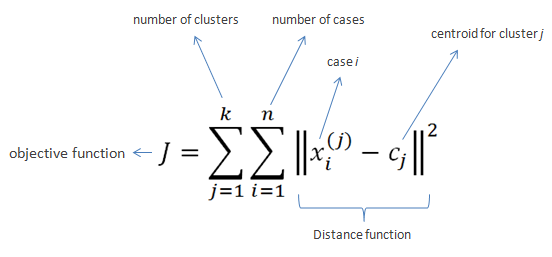

In [4]:
## Calculating WCSS with one cluster (K=1)
#Centroid
c = np.array([6.67,8.33])
wcss = np.sum(np.sum((X - c)**2))
print("Within Cluster Sum of Squares (for k=1 and centroid (6.67,8.33))")
print("WCSS = %f"%wcss)

Within Cluster Sum of Squares (for k=1 and centroid (6.67,8.33))
WCSS = 73409.432727


**(1c) Write a function to find which class each point belongs to given the centroids and value of K**

Hint: data has dimensions (m x n), centroids has dimensions (K x n)

In [5]:
import numpy as np
def get_class(data,centroids,K):
    
    size = data.shape[0]
    data_class = np.zeros([size]) #Create an array to store classes of each data
    
    for i in range(size):
        x = np.array(data.loc[i]).reshape(1,-1)
        M = np.inf
        for j in range(K):
            #Computing Euclidean Distance
            dist = np.sum((x-centroids[j,:])**2)
            if dist<M:
                #Storing class corresponding to minimum distance 
                M = dist
                data_class[i] = j
      
    return data_class

**(1d) Write a function to find the centroids given the data points and the corresponding class**

In [6]:
def get_centroids(data,data_class,K):
    dim = data.shape[1] #The number of columns in data
    centroids = np.zeros((K,dim))
    
    for i in range(K):
        class_data = data[data_class==i]
        centroids[i,:] = np.array(np.mean(class_data)).reshape(1,-1)

    return centroids

**(1e) Write a function to calculate WCSS given the data points, the centroids and K** 

In [7]:
def wcss(data,centroids,K):
    wcss_clusterwise = np.zeros([K]) #Array to store WCSS of individual clusters
    
    data_class = get_class(data,centroids,K)
    
    #Calculating for each cluster
    for i in range(K):
        wcss_clusterwise[i] = np.sum(np.sum((data[data_class == i]-centroids[i,:])**2))
    #Adding values of all clusters
    wcss = np.sum(wcss_clusterwise) 
    return(wcss)

**K Means Algorithm:<br>**
    1) Allocate a class to each data point given the initial centroids<br>
    2) Calculate the new centroids,i.e, the mean of the data points in each class<br>
    3) Iterate till the stopping criteria. In our case the algorithm stops when the shift in each centroid is less than tolerance<br>
    

**(1f) Let $K = 3$ and the initial cluster centroids be $[10,30], [25,-5]$ and $[-5,10]$ and write a function to implement K-means clustering using functions defined above. Plot the final clusters with K-means clustering.<br> Take tolerance as $0.001$**

In [8]:
def kmeans(data,K,centroids):
    # Write code here
    size,dim = data.shape[0],data.shape[1]
    tol  = 10e-3
    cent_ = np.zeros((K,dim))
    ite = 0 
    
    while np.sum(np.linalg.norm(abs(cent_-centroids),2,axis=1)<tol)!=K:
        ite += 1
        cent_ = centroids
        data_class = get_class(data,centroids,K)
      
        centroids = get_centroids(data,data_class,K)
        
    return data_class,centroids

Text(0, 0.5, 'x2')

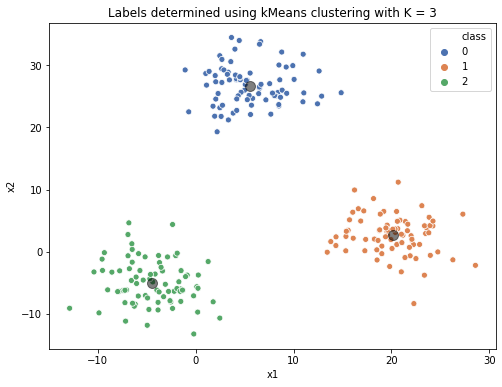

In [16]:
# KMeans with K = 3
data_class,centroids = kmeans(X,K = 3,centroids = np.array([[10,30],[25,-5],[-5,10]]))

data_with_class = pd.concat([X,pd.DataFrame(data_class.astype(int),columns=["class"])],axis = 1)

# plotting
plt.figure(figsize=(8,6))
plt.title("Labels determined using kMeans clustering with K = 3")
sns.scatterplot(data = data_with_class, x = 0,y = 1,hue = "class",palette="deep")
plt.plot(centroids[:,0],centroids[:,1],"ok",markersize=10,alpha=.5)
plt.xlabel("x1")
plt.ylabel("x2")

**Where the bigger translucent circles represent the centroids.**

**(1g) Compute the sum of square distance of each point from the cluster centroid.**

In [10]:
#  Write code here
wcss_val = wcss(X,centroids,K=3)
print("Within-Cluster Sum of Squares for 3 clusters = %e"%wcss_val)

Within-Cluster Sum of Squares for 3 clusters = 4.936722e+03


**(1h) Repeat the above exercise for $K = 1,2,3,4$. You can use appropriate initial centroids based on the visualization**

**Plot the final clusters (for $K = 1,2,3,4$) and report the sum of square distance of each point from the cluster mean. Give your observations.**

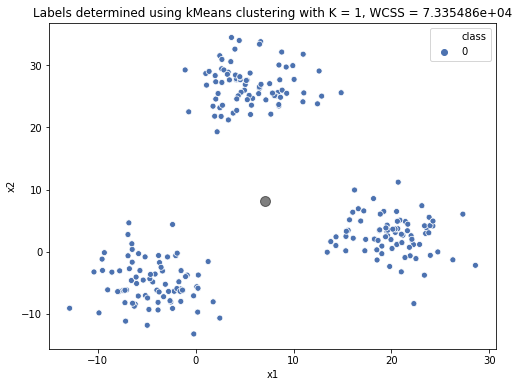

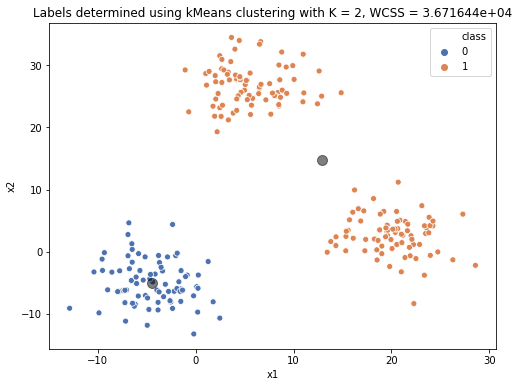

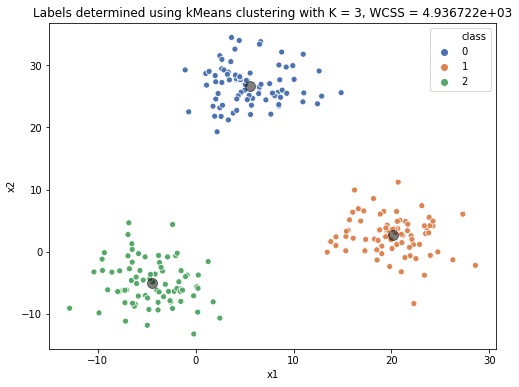

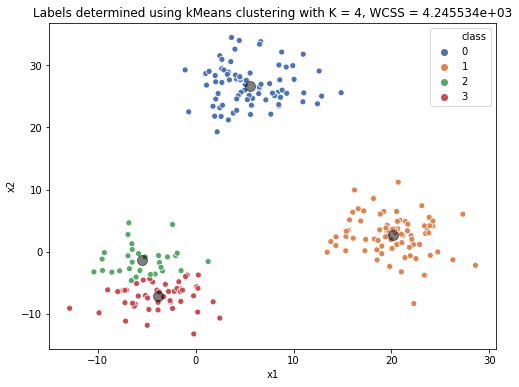

In [17]:
#  Trying out different K values
K_vals = [1,2,3,4]
for K in K_vals:
    #Centroids Initialization for different values of K
    if K==1:
        centroids = np.array([[10,10]])
    elif K==2:
        centroids = np.array([[-5,-10],[15,25]])
    elif K==3:
        centroids = np.array([[10,30],[25,-5],[-5,10]])
    elif K==4:
        centroids = np.array([[10,30],[25,0],[-5,10],[0,-1]])
    
    
    data_class,centroids = kmeans(X,K = K,centroids = centroids)

    data_with_class = pd.concat([X,pd.DataFrame(data_class.astype(int),columns=["class"])],axis = 1)
    
    #Computing WCSS of validation
    wcss_value = wcss(X,centroids,K=K)
    
    #Plotting
    plt.figure(figsize=(8,6))
    plt.title("Labels determined using kMeans clustering with K = %d"%K + ", WCSS = %e"%wcss_value)
    sns.scatterplot(data = data_with_class, x = 0,y = 1,hue = "class",palette="deep")
    plt.plot(centroids[:,0],centroids[:,1],"ok",markersize=10,alpha=.5)
    plt.xlabel("x1")
    plt.ylabel("x2")

**Where the bigger translucent circles represent the centroids.**

It can be noticed that as the value of K (number of clusters) increases from 1-4, the value of sum of square distance of each point from the cluster centroid decreases. However, upon visualization, it is evident that K = 3 fits the data the best of all, giving 3 distinct well-separated clusters. Hence, the WCSS value is not a reliable measure to find the best value of K and other metrics must be explored.

K = 1 assigns all the data points to the same clusters, and since this is usually not the case, it is not a very popular choice. 

**(2a) Load the data from the file 'kmc-data2.csv' and visualize the data on a scatter plot.**

In [12]:
#  Loading kmc-data2.csv
X_kmc2 = pd.read_csv("kmc-data2.csv",header = None)
X_kmc2

,0,1
0,0.168757,2.995250
1,1.219350,2.741019
2,2.881121,-0.836147
3,-1.025153,-2.819408
4,-0.724449,2.911215
...,...,...
195,4.487142,2.205800
196,1.356851,-4.812375
197,0.403117,-4.983723
198,4.156507,-2.779109


Text(0.5, 0, 'x2')

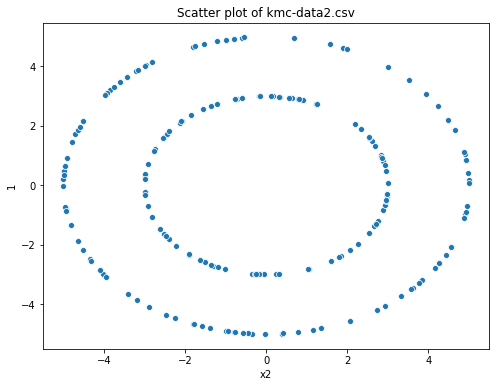

In [13]:
#Visualizing kmc_data2
plt.figure(figsize=(8,6))
sns.scatterplot(data = X_kmc2,x = 0,y = 1)
plt.title("Scatter plot of kmc-data2.csv")
plt.xlabel("x1")
plt.xlabel("x2")

**(2b) Cluster the data with K-means clustering. Consider $K = 2$. (You can use scikit-learn library for to perform clustering)**

Text(0, 0.5, 'x2')

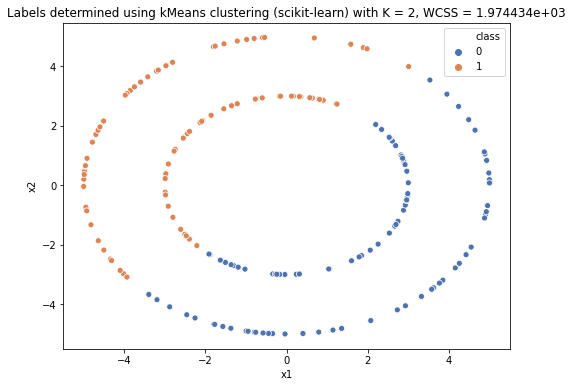

In [14]:
#  Write code here
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, random_state=0).fit(X_kmc2)
data_with_class = pd.concat([X_kmc2,pd.DataFrame(kmeans_model.labels_.astype(int),columns=["class"])],axis = 1)

plt.figure(figsize=(8,6))
plt.title("Labels determined using kMeans clustering (scikit-learn) with K = 2, WCSS = %e"%(-kmeans_model.score(X_kmc2)))
sns.scatterplot(data = data_with_class, x = 0,y = 1,hue = "class",palette="deep")
plt.xlabel("x1")
plt.ylabel("x2")

#### **(2c) Suppose you want to identify two ring clusters as visualised in the scatter plot. Now, transform the data such that K-means clustering identifies the two ring clusters.**

Hint: The points in the inner circle have the same radius and so do the points on the outer circle. This can be an effective way to cluster those points. Now think of transforming the 2D data to 1D data and then cluster.

As it is clearly evident that the data is in the form of 2 concentric circles with different radii, we can convert the 2D data set into 1D by choosing $R$ as 

$$R_i= x_i^2+y_i^2$$

We can further use the vector $R$ to perform kMeans clustering. This way, the points which are forming the inner circle will belong to one class (as they all have similar radius) and the points which are forming the outer circle will belong to another class.

Text(0, 0.5, 'x2')

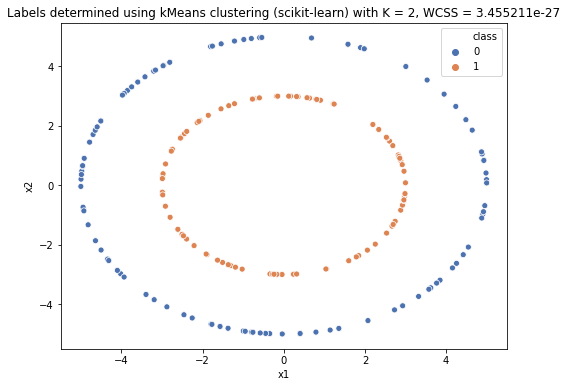

In [15]:
# 2D to 1D conversion
R2_kmc2 = np.array(X_kmc2[0]**2 + X_kmc2[1]**2).reshape(-1,1)
kmeans_model = KMeans(n_clusters=2, random_state=0).fit(R2_kmc2)

data_with_class = pd.concat([X_kmc2,pd.DataFrame(kmeans_model.labels_.astype(int),columns=["class"])],axis = 1)
plt.figure(figsize=(8,6))
plt.title("Labels determined using kMeans clustering (scikit-learn) with K = 2, WCSS = %e"%(-kmeans_model.score(R2_kmc2)))
sns.scatterplot(data = data_with_class, x = 0,y = 1,hue = "class",palette="deep")
plt.xlabel("x1")
plt.ylabel("x2")

**(3) Perform K-means clustering on Bank note dataset (attached) which is a classification dataset. Split the data into test and train (80:20 ratio with random seed=0). Perform clustering on the training data and predict labels for test data based on the clusters obtained. Compare the predictions with actual labels and report accuracy. (You can use scikit-learn library for K-means and train-test split and accuracy)**

In [16]:
#Importing sklearn requirements
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#loading bank_data
bank_data = pd.read_csv("data_banknote_authentication.csv",header=None)
X_bank = bank_data[[0,1,2,3]]
y_bank = bank_data[[4]]

X_train,X_test,y_train,y_test = train_test_split(X_bank,y_bank,test_size = 0.2,random_state = 0)

kmeans_bank_model  = KMeans(n_clusters=len(np.unique(y_bank)),random_state=0).fit(X_train)

train_acc = accuracy_score(y_train,kmeans_bank_model.labels_.reshape(-1,1))
test_acc = accuracy_score(y_test,kmeans_bank_model.predict(X_test).reshape(-1,1))

In [17]:
print("Training Accuracy Score = %f"%train_acc)
print("Test Accuracy Score = %f"%test_acc)

Training Accuracy Score = 0.593437
Test Accuracy Score = 0.669091


It can be noted that the training accuracy is $59.34\%$ and test accuracy is $66.91\%$, clearly indicating that the test accuracy is higher than that of training accuracy in this case

## Logistic Regression

Logistic Regression uses the sigmoid function for binary classification. 

**(4a) Plot the sigmoid function $\frac{1}{1+e^{-x}}$ for x in the range [-20,20] at 100 equally spaced values. This exercise will help you understand the shape of the sigmoid function and show its relevance in binary classification problems**

Text(0.5, 1.0, 'Sigmoid Curve')

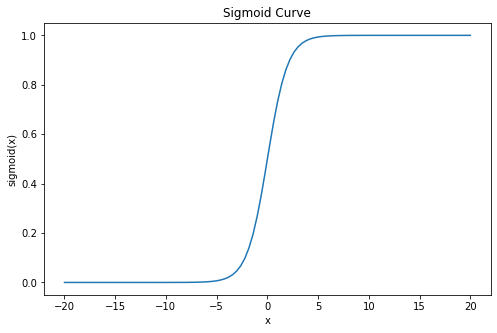

In [18]:
# Code here
x = np.linspace(-20,20,100)
sig_x = lambda x: 1/(1+np.exp(-x))
plt.figure(figsize=(8,5))
plt.plot(x,sig_x(x),"-")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.title("Sigmoid Curve")

**(4b) Comment on the nature of the sigmoid function graph (specifically : domain,range,behaviour in extreme inputs).**

The sigmoid function graph is an "S" shaped curve and it is monotonically increasing. The domain of the function is all real values ($x\in \mathbb{R}$) and the function takes all real values between $-1$ and $1$ (Range: $(-1,1)$ -> open interval excluding -1 and 1). The function shows asymptotic behaviour at extreme points. As $x\to \inf$, $\text{sigmoid}(x)\to1$ and As $x\to -\inf$, $\text{sigmoid}(x)\to0$. At $x=0$, the funtion takes the value of $0.5$, which is also the point of inflection.

**(4c) Using the derivative formula of sigmoid function, plot the gradients of the sigmoid function for the 100 values in the range [-20,20].**

Text(0.5, 1.0, 'Derivative (Gradient) of Sigmoid Function')

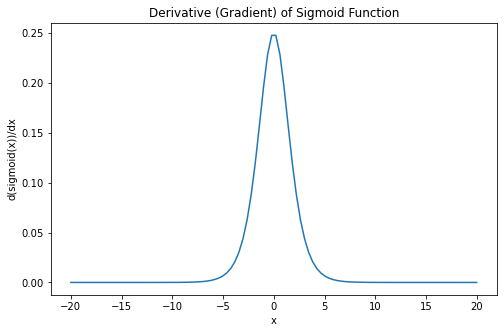

In [19]:
# Code here
deriv_sigmoid = lambda x: (1+np.exp(-x))**(-2)*np.exp(-x)
plt.figure(figsize=(8,5))
plt.plot(x,deriv_sigmoid(x),"-")
plt.xlabel("x")
plt.ylabel("d(sigmoid(x))/dx")
plt.title("Derivative (Gradient) of Sigmoid Function")

**Consider the given data X_logistic.txt and y_logistic.txt. Perform random shuffle and then split the data as train-validation-test sets in the ratio of 80:10:10. Note that the y value gives the class label (0 or 1).** 

**(5a) Implement logistic regression (using only numpy) to predict whether the test datapoints belong to class 0 or 1. Gradient descent also has to be implemented using numpy. Choose the best learning rate parameter between 0.001, 0.01, 0.1 and the number of iterations between 50, 100 and 1000 by using validation dataset. Using the chosen model (best learning rate and number of iterations), report the prediction accuracy on test data. Use a random initialization of weights.**



In [60]:
# Loading Data for Logistic Regression
X_logistic = pd.read_csv("X_logistic.txt",sep = " ",header = None)
y_logistic = pd.read_csv("y_logistic.txt",sep = " ",header = None)

#Train-Validation-Test Split
X_tmp,X_test,y_tmp,y_test = train_test_split(X_logistic,y_logistic,test_size = 0.1,random_state = 2)
X_train,X_val,y_train,y_val = train_test_split(X_tmp,y_tmp,test_size = 1/9)

In [61]:
def sigmoid(X):
    sig_X = 1/(1+np.exp(-X))
    return sig_X

def computeCost(X, y, theta):
    
    m = X.shape[0]
    
    #Linear activation
    z = np.dot(X,theta)
    #Sigmoidal Activation
    a = sigmoid(z)
    
    #Logistic loss
    J = -np.sum(y*np.log(a)+(1-y)*np.log(1-a))/m

    return J
    
    

In [66]:
def gradientDescent(X_appended, y, theta, alpha,num_iter):
    
    
    count = 0
    m = X_appended.shape[0]
    
    #Derivative of cost function
    diff_cost = lambda y_cap,y,x,m: ((1/m)*np.dot((y_cap - y).T,x)).T
    
    
    while num_iter>=count:
        y_prob = sigmoid(np.dot(X_appended,theta))
        #Calculating Cost function
        cost = computeCost(X_appended, y, theta)
        #Updating Parameters
        theta -= alpha*diff_cost(y_prob,y,X_appended,m)
        #Number of iterations
        count += 1
    
    return theta, y_prob, cost

In [67]:
#Hyperparameter choices
learning_rates = [0.001, 0.01, 0.1]
max_iter = [50,100,1000]

m,dim = X_train.shape[0],X_train.shape[1]

#Appending 1s for bias term
X_app_train = np.append(np.ones((m,1)),X_train,axis=1)
X_val_app = np.append(np.ones((X_val.shape[0],1)),X_val,axis=1)

#Setting threshold probability = 0.5
thresh = 0.5

theta_list = []

# Random initialization of weights
np.random.seed(4)
theta0 = np.random.random((dim+1,1)).reshape(-1,1)

for alpha in learning_rates:
    for num_iter in max_iter:
        #Using same initializations for all hyperparameter sets
        theta = theta0.copy()
        #Calling Gradient Descent
        theta, y_prob, cost = gradientDescent(X_app_train,y_train,theta,alpha,num_iter)
        #Predicting Training classes
        y_train_pred = (y_prob>thresh).astype(int)
        #Training Accuracy
        train_acc = accuracy_score(y_train,y_train_pred)
        theta_list.append(theta)
        
        print("Model with learning rate %.3f"%alpha+" and number of iterations %d"%num_iter)
        print("Training Cost = %f"%cost)
        print("Training Accuracy = %f"%train_acc)
        
        #Computing Validation Loss
        val_cost = computeCost(X_val_app,y_val,theta)
        #Predicting Validation classes
        y_val_pred = (sigmoid(np.dot(X_val_app,theta))>thresh).astype(int)
        #Validation Accuracy
        val_acc = accuracy_score(y_val,y_val_pred)
        print("Validation Cost = %f"%val_cost)
        print("Validation Accuracy = %f"%val_acc)
        print()

Model with learning rate 0.001 and number of iterations 50
Training Cost = 2.865138
Training Accuracy = 0.537500
Validation Cost = 3.071963
Validation Accuracy = 0.500000

Model with learning rate 0.001 and number of iterations 100
Training Cost = 2.464977
Training Accuracy = 0.537500
Validation Cost = 2.641119
Validation Accuracy = 0.500000

Model with learning rate 0.001 and number of iterations 1000
Training Cost = 0.782877
Training Accuracy = 0.387500
Validation Cost = 0.798340
Validation Accuracy = 0.300000

Model with learning rate 0.010 and number of iterations 50
Training Cost = 0.832745
Training Accuracy = 0.512500
Validation Cost = 0.853304
Validation Accuracy = 0.500000

Model with learning rate 0.010 and number of iterations 100
Training Cost = 0.782873
Training Accuracy = 0.387500
Validation Cost = 0.797568
Validation Accuracy = 0.300000

Model with learning rate 0.010 and number of iterations 1000
Training Cost = 0.392709
Training Accuracy = 0.987500
Validation Cost = 0.3

As the **last model (with learning rate 0.1 and number of iterations 1000)** performs best in all aspects - Training loss/accuracy and Validation loss/accuracy, we choose that as the best model for downstream evalutation on the test data.

In [59]:
# Evaluating accuracy on the test data using the best model - Learning rate = 0.1 and Number of iterations = 1000
X_test_app = np.append(np.ones((X_test.shape[0],1)),X_test,axis=1)
theta_best = theta_list[-1]
#Computing Test Cost
test_cost = computeCost(X_test_app,y_test,theta_best)
#Predicting test labels
y_test_pred = (sigmoid(np.dot(X_test_app,theta_best))>thresh).astype(int)
test_acc = accuracy_score(y_test,y_test_pred)

print("Test cost = %f"%test_cost)
print("Test Accuracy = %f"%test_acc)

Test cost = 0.091343
Test Accuracy = 1.000000


**(5b) Plot the logistic regression classifier (decision boundary) on a 2d plot and include the train and test datapoints on the plot in different colours.
(Say dark green for class 0 test datapoints and dark red for class 1 test datapoints. Similarly, light green and light red for train datapoints).**

Text(0.5, 1.0, 'Logistic Regression Classifier')

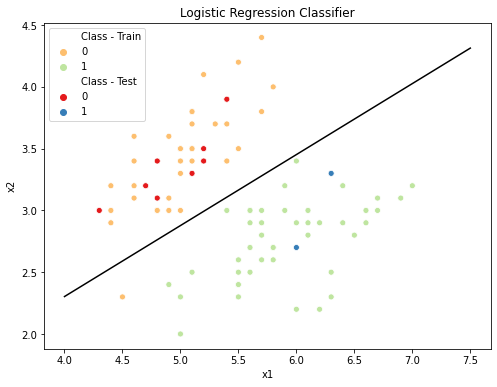

In [68]:
# Plotting
x_boundary = np.linspace(4,7.5,100)
y_boundary = (-theta_best[0]-theta_best[1]*x_boundary)/theta[2]
y_train.columns = ["Class - Train"]
y_test.columns = ["Class - Test"]
data_with_class_train = pd.concat([X_train,y_train.astype(int)],axis = 1)
data_with_class_test = pd.concat([X_test,y_test.astype(int)],axis = 1)
plt.figure(figsize=(8,6))

sns.scatterplot(data = data_with_class_train,x = 0,y=1,hue = "Class - Train",palette="Spectral")
sns.scatterplot(data = data_with_class_test,x = 0,y=1,hue = "Class - Test",palette="Set1")
plt.plot(x_boundary,y_boundary,"-k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Logistic Regression Classifier")

**(6) Consider the bank note dataset provided. Perform random shuffle and train-test split(80:20). Using sklearn, implement logistic regression to predict whether the test datapoints belong to class 0 or 1. Report the prediction accuracy on test data.**

In [26]:
#Importing sklearn's Logistic Regression
from sklearn.linear_model import LogisticRegression
bank_data = pd.read_csv("data_banknote_authentication.csv",header=None)

X_bank = bank_data[[0,1,2,3]]
y_bank = bank_data[[4]]

X_train,X_test,y_train,y_test = train_test_split(X_bank,y_bank,test_size = 0.2,random_state = 0)

Log_reg_model = LogisticRegression().fit(X_train,np.ravel(y_train))
#Training Score
print("Training Accuracy (sklearn) = %f"%Log_reg_model.score(X_train,np.ravel(y_train)))
#Test Score
print("Test Accuracy (sklearn) = %f"%Log_reg_model.score(X_test,np.ravel(y_test)))

Training Accuracy (sklearn) = 0.989973
Test Accuracy (sklearn) = 0.992727


Hence, the training accuracy is $98.997\%$ and the test accuracy is $99.27\%$